# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/DF%20Spring%202023/Module%203-%20Exponential%20Smoothing/Module3-ETS_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Stock market price predictions

Can we predict stock market price with classical econometrics models or machine learning models?

Documentation: 

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **sktime** : https://www.sktime.org/en/stable/api_reference/forecasting.html

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [ ]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.3/504.3 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 424.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 12.5 MB/s eta 0:00:00
  

In [ ]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.0.0.rc8'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Stock Dataset

In [ ]:
stocks = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/yfinance.csv", index_col=0, header=[0,1])
stocks.head()

Adj Close                                                 \
                 AAPL         GLD       MSFT         QQQ         SPY   
Date                                                                   
2018-01-02  40.950497  125.150002  80.940392  153.123489  246.766678   
2018-01-03  40.943367  124.820000  81.317093  154.611298  248.327499   
2018-01-04  41.133541  125.459999  82.032768  154.881836  249.374115   
2018-01-05  41.601864  125.330002  83.049835  156.437332  251.035934   
2018-01-08  41.447350  125.309998  83.134598  157.045990  251.495041   

                                      Close                         ...  \
                 TSLA        USO       AAPL         GLD       MSFT  ...   
Date                                                                ...   
2018-01-02  21.368668  96.559998  43.064999  125.150002  85.949997  ...   
2018-01-03  21.150000  98.720001  43.057499  124.820000  86.349998  ...   
2018-01-04  20.974667  98.959999  43.257500  125.459999  87.110001  ...   
2018-01-05  21.105333  98.480003  43.750000  125.330002  88.190002  ...   
2018-01-08  22.427334  99.040001  43.587502  125.309998  88.279999  ...   

                  Open                           Volume                      \
                   SPY       TSLA        USO       AAPL       GLD      MSFT   
Date                                                                          
2018-01-02  267.839996  20.799999  96.559998  102223600  11762500  22483800   
2018-01-03  268.959991  21.400000  97.360001  118071600   7904300  26061400   
2018-01-04  271.200012  20.858000  98.639999   89738400   7329700  21912000   
2018-01-05  272.510010  21.108000  98.239998   94640000   5739900  23407100   
2018-01-08  273.309998  21.066668  98.480003   82271200   3566700  22113000   

                                                    
                 QQQ       SPY       TSLA      USO  
Date                                                
2018-01-02  32573300  86655700   65283000  1497588  
2018-01-03  29383600  90070400   67822500  2156150  
2018-01-04  24776100  80636400  149194500  1480988  
2018-01-05  26992300  83524000   68868000  1609888  
2018-01-08  23159100  57319200  147891000  1229225  

[5 rows x 42 columns]

In [ ]:
# if you are working with Pandas, your first job should be changing the type of the index to datetime and then to period! This is a compatibility issue with other packages. 
stocks.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-16',
       ...
       '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
       '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30'],
      dtype='object', name='Date', length=1259)

In [ ]:
stocks.index = pd.to_datetime(stocks.index).to_period('B')
stocks.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
             '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', name='Date', length=1259)

In [ ]:
df = stocks['Close'][['AAPL']]
df.head()

,AAPL
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


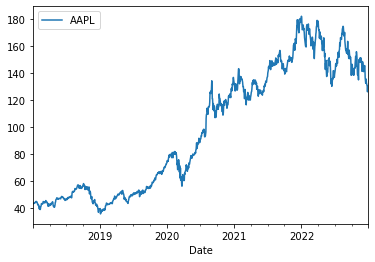

In [ ]:
df.plot()
plt.show()

In [ ]:
df.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
             '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', name='Date', length=1259)

In [ ]:
idx = pd.period_range(min(df.index), max(df.index))
idx

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-15',
             ...
             '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
             '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', length=1304)

In [ ]:
df.index.symmetric_difference(idx)

PeriodIndex(['2018-01-15', '2018-02-19', '2018-03-30', '2018-05-28',
             '2018-07-04', '2018-09-03', '2018-11-22', '2018-12-05',
             '2018-12-25', '2019-01-01', '2019-01-21', '2019-02-18',
             '2019-04-19', '2019-05-27', '2019-07-04', '2019-09-02',
             '2019-11-28', '2019-12-25', '2020-01-01', '2020-01-20',
             '2020-02-17', '2020-04-10', '2020-05-25', '2020-07-03',
             '2020-09-07', '2020-11-26', '2020-12-25', '2021-01-01',
             '2021-01-18', '2021-02-15', '2021-04-02', '2021-05-31',
             '2021-07-05', '2021-09-06', '2021-11-25', '2021-12-24',
             '2022-01-17', '2022-02-21', '2022-04-15', '2022-05-30',
             '2022-06-20', '2022-07-04', '2022-09-05', '2022-11-24',
             '2022-12-26'],
            dtype='period[B]')

In [ ]:
df = df.reindex(idx, fill_value=np.nan)
df.tail()

,AAPL
2022-12-26,NaN
2022-12-27,130.029999
2022-12-28,126.040001
2022-12-29,129.610001
2022-12-30,129.929993


In [ ]:
df = df.fillna(method = 'ffill')
df.tail(10)

,AAPL
2022-12-19,132.369995
2022-12-20,132.300003
2022-12-21,135.449997
2022-12-22,132.229996
2022-12-23,131.860001
2022-12-26,131.860001
2022-12-27,130.029999
2022-12-28,126.040001
2022-12-29,129.610001
2022-12-30,129.929993


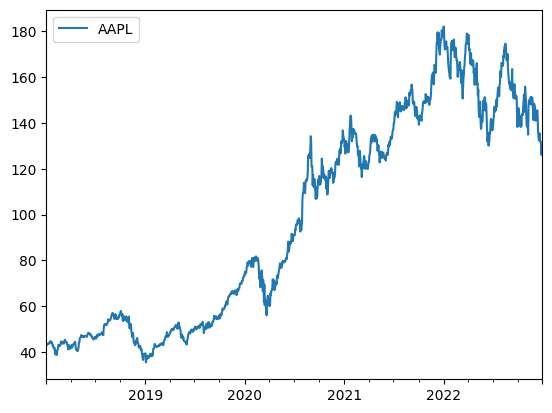

In [ ]:
df.plot()
plt.show()

# Time series Cross validation with PyCaret

In [ ]:
from pycaret.time_series import *

In [ ]:
from sktime.forecasting.model_selection import SlidingWindowSplitter
# https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.forecasting.model_selection.SlidingWindowSplitter.html

In [ ]:
import numpy as np
from sktime.forecasting.model_selection import SlidingWindowSplitter
ts = np.arange(10)
splitter = SlidingWindowSplitter(fh=np.arange(1,5), window_length=3, step_length=2)
list(splitter.split(ts)) 

[(array([0, 1, 2]), array([3, 4, 5, 6])),
 (array([2, 3, 4]), array([5, 6, 7, 8]))]

In [ ]:
df.size

1304

In [ ]:
exp = TSForecastingExperiment()
exp.setup(data = df, target='AAPL' ,coverage=0.90, fold_strategy=SlidingWindowSplitter(fh=np.arange(1,23), window_length=120, step_length=60)) # using the past 6 month to make prediction for the next month. 

,Description,Value
0,session_id,1468
1,Target,AAPL
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1304, 1)"
5,Transformed data shape,"(1304, 1)"
6,Transformed train set shape,"(1282, 1)"
7,Transformed test set shape,"(22, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,SlidingWindowSplitter


---
---
___ 

Side note: 

I am not sure why, but PyCaret timeseries setup does not support sklearn cross validation strategies like "TimeSeriesSplit". This is available with the PyCaret regression and classification though!!!

I was expecting the following code running in Pycaret but it doesn't. 


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
exp2 = TSForecastingExperiment()
#exp2.setup(data = df, target='AAPL' , coverage=0.90, fold_strategy=TimeSeriesSplit(n_splits=5, max_train_size=250, gap=20, test_size=60)) 

from pycaret.regression import *
exp3= RegressionExperiment()
exp3.setup(data = df, target='AAPL' , fold_strategy=TimeSeriesSplit(n_splits=5, max_train_size=250, gap=20, test_size=60)) 


,Description,Value
0,Session id,5811
1,Target,AAPL
2,Target type,Regression
3,Original data shape,"(1304, 1)"
4,Transformed data shape,"(1304, 1)"
5,Transformed train set shape,"(912, 1)"
6,Transformed test set shape,"(392, 1)"
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


---
---
---

In [ ]:
exp.plot_model(plot='train_test_split')

In [ ]:
exp.plot_model(plot='cv')

Output hidden; open in https://colab.research.google.com to view.

Let's see which one is the best model?

In [ ]:
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,1.1362,1.0863,4.9224,5.7906,0.0462,0.0460,-1.7542,4.9315
ets,ETS,1.1577,1.1166,4.9828,5.9122,0.0485,0.0480,-1.8424,0.1780
theta,Theta Forecaster,1.1603,1.0990,4.9369,5.7914,0.0480,0.0478,-1.7265,0.0420
naive,Naive Forecaster,1.1632,1.1022,4.8660,5.7435,0.0475,0.0476,-1.6822,0.3300
exp_smooth,Exponential Smoothing,1.1927,1.1603,5.0531,6.0212,0.0498,0.0495,-2.0127,0.1070
arima,ARIMA,1.2095,1.1930,5.1472,6.2081,0.0512,0.0509,-2.3841,0.0995
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.3390,1.2609,5.9564,6.8842,0.0560,0.0551,-2.7422,1.2660
snaive,Seasonal Naive Forecaster,1.3413,1.2826,5.6969,6.7529,0.0541,0.0546,-3.4182,0.0305
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.3788,1.2977,6.1114,7.0683,0.0580,0.0573,-2.9974,0.8305
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.4135,1.3538,6.3519,7.5066,0.0597,0.0599,-3.3054,0.7345


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

AutoARIMA(random_state=1468, sp=9, suppress_warnings=True)

# Bootstrapping with PyCaret?

* curious to see how to bootstrapping is handled with PyCaret? 
serach for the random forest model (rf_cds_dt) source code in Pycaret Github for example. 
* As you may see here (https://github.com/pycaret/pycaret/blob/676cdb963877f98496a57bc77317356a09e10d70/pycaret/containers/models/time_series.py ), the bootstrap is on and off and that's it. No special consideration for moving block bootstrap or circular block or stationary bootstrap. 

* You can do it from scratch here: https://arch.readthedocs.io/en/latest/bootstrap/timeseries-bootstraps.html
---

In [93]:
exp.compare_models(include=['naive','auto_arima', 'ets'], sort='R2')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,1.1632,1.1022,4.8660,5.7435,0.0475,0.0476,-1.6822,0.2880
auto_arima,Auto ARIMA,1.1362,1.0863,4.9224,5.7906,0.0462,0.0460,-1.7542,5.7880
ets,ETS,1.1577,1.1166,4.9828,5.9122,0.0485,0.0480,-1.8424,0.3235


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

NaiveForecaster()

In [94]:
arima = exp.create_model('auto_arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,"PeriodIndex(['2018-06-18'], dtype='period[B]')",0.5220,0.4708,0.9737,1.1285,0.0210,0.0207,-1.4740
1,"PeriodIndex(['2018-09-10'], dtype='period[B]')",0.8306,0.7782,1.5140,1.8164,0.0268,0.0273,-2.1094
2,"PeriodIndex(['2018-12-03'], dtype='period[B]')",1.5907,1.3378,3.4572,3.7403,0.0871,0.0827,-1.9786
3,"PeriodIndex(['2019-02-25'], dtype='period[B]')",0.8275,0.8420,1.9097,2.4943,0.0408,0.0423,-1.1275
4,"PeriodIndex(['2019-05-20'], dtype='period[B]')",0.9090,0.8484,1.7706,2.0651,0.0376,0.0381,-0.1113
5,"PeriodIndex(['2019-08-12'], dtype='period[B]')",1.3407,1.2383,2.7245,3.0210,0.0515,0.0532,-4.8210
6,"PeriodIndex(['2019-11-04'], dtype='period[B]')",0.4229,0.4948,0.8071,1.1228,0.0123,0.0122,-0.9903
7,"PeriodIndex(['2020-01-27'], dtype='period[B]')",1.0201,1.2615,2.4152,3.5210,0.0315,0.0307,-0.7435
8,"PeriodIndex(['2020-04-20'], dtype='period[B]')",1.1813,1.0466,4.4077,5.2445,0.0577,0.0600,-0.9899
9,"PeriodIndex(['2020-07-13'], dtype='period[B]')",1.1452,1.0817,5.1015,5.9718,0.0491,0.0496,0.3736


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [96]:
exp.plot_model(estimator=arima, plot="diagnostics")

In [97]:
exp.plot_model(arima, plot='forecast', data_kwargs={'fh':36})

---
# Predict Model

This function predicts Label using a trained model. When data is None, it predicts label on the holdout set.



In [98]:
holdout_pred = exp.predict_model(arima)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Auto ARIMA,2.2896,2.0026,10.1488,12.0530,0.0762,0.0723,-2.1764


In [99]:
holdout_pred

,y_pred
2022-12-01,147.4009
2022-12-02,147.0104
2022-12-05,146.8068
2022-12-06,147.1310
2022-12-07,147.8736
2022-12-08,147.8067
2022-12-09,147.9165
2022-12-12,147.7023
2022-12-13,148.3599
2022-12-14,148.2906


# Finalize Model

This function trains a given estimator on the entire dataset including the holdout set.

Model finalization is the last step in the experiment. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample. The purpose of this function is to train the model on the complete dataset before it is deployed in production.


In [100]:
final_model = exp.finalize_model(arima)

In [103]:
exp.plot_model(final_model, plot='forecast', data_kwargs={'fh':12})

In [102]:
unseen_predictions = exp.predict_model(final_model, fh=10)
unseen_predictions

,y_pred
2023-01-02,130.0218
2023-01-03,130.2018
2023-01-04,129.6610
2023-01-05,129.6373
2023-01-06,129.3942
2023-01-09,129.4665
2023-01-10,128.9476
2023-01-11,129.9630
2023-01-12,130.0285
2023-01-13,129.6991


# Done!